# Задание 1.1
Предварительный анализ данных по арендной плате квартир

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns

pd.options.display.max_rows = 8

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("../data/Ap_Rent_2023.csv", sep=';')
df

,rent,s,floor,rooms,district,walls,furniture
0,27500,35.0,5,1,3,1,1
1,29800,31.0,2,1,2,0,1
2,32000,30.0,4,1,3,1,1
3,50000,55.0,1,2,3,1,1
...,...,...,...,...,...,...,...
126,47800,54.0,1,2,1,1,1
127,34200,54.0,3,2,2,0,1
128,20800,12.0,4,1,3,1,0
129,34200,68.0,4,2,2,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rent       130 non-null    int64  
 1   s          130 non-null    float64
 2   floor      130 non-null    int64  
 3   rooms      130 non-null    int64  
 4   district   130 non-null    int64  
 5   walls      130 non-null    int64  
 6   furniture  130 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 7.2 KB


<Axes: >

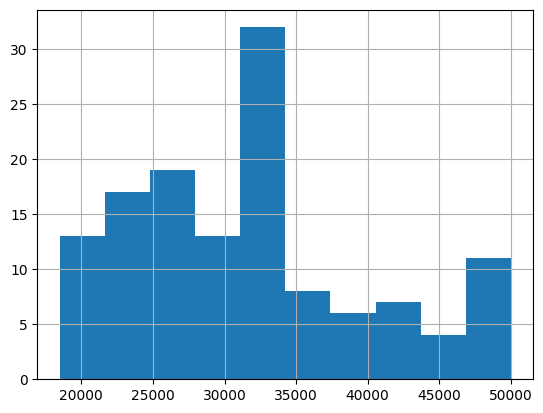

In [6]:
df['rent'].hist()

<Axes: >

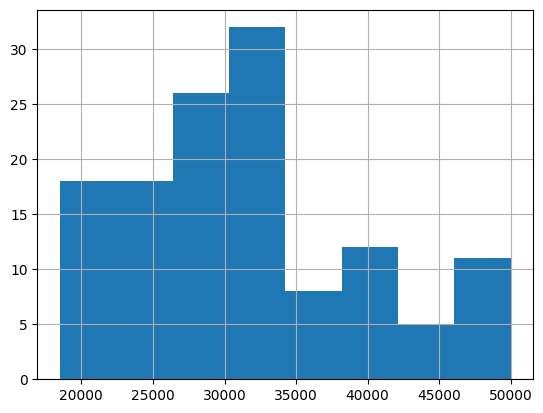

In [7]:
df['rent'].hist(bins=8)

<Axes: >

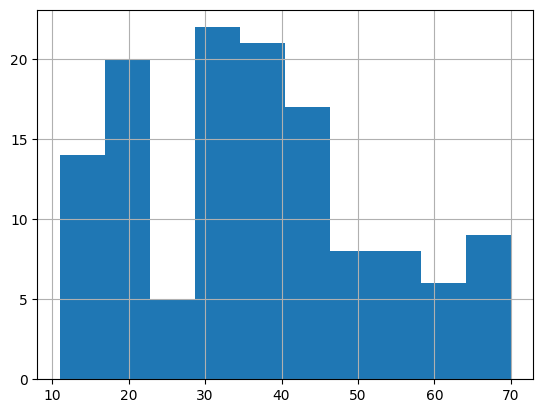

In [8]:
df['s'].hist()

<Axes: >

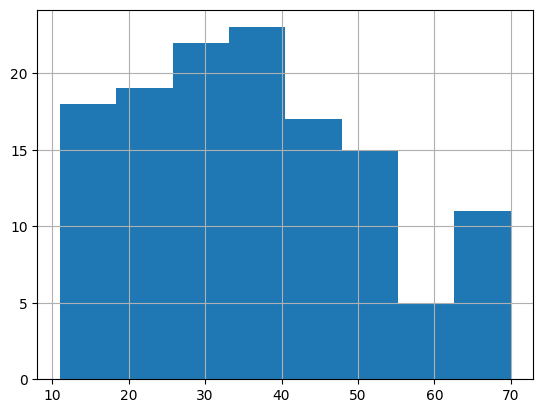

In [9]:
df['s'].hist(bins=8)

In [10]:
df.drop(['walls','furniture','district'],axis=1).describe()

,rent,s,floor,rooms
count,130.000000,130.000000,130.000000,130.000000
mean,31837.692308,36.439231,4.153846,1.376923
std,8412.175242,15.753831,2.680569,0.613358
min,18500.000000,11.000000,1.000000,1.000000
25%,25200.000000,21.250000,2.000000,1.000000
50%,32000.000000,36.000000,3.000000,1.000000
75%,36500.000000,45.000000,5.000000,2.000000
max,50000.000000,70.000000,12.000000,3.000000


In [11]:
df[['rent','s']].mean() 

rent    31837.692308
s          36.439231
dtype: float64

In [12]:
df[['rent','s']].std() 

rent    8412.175242
s         15.753831
dtype: float64

In [ ]:
df[['rent','s']].skew() # коэффициент асимметрии

rent    0.539389
s       0.328439
dtype: float64

In [ ]:
df[['rent','s']].kurtosis() # коэффициент эксцесса

rent   -0.348366
s      -0.706654
dtype: float64

In [15]:
df['floor'].value_counts()

floor
3     28
1     21
2     17
4     17
      ..
6      5
9      4
12     4
10     1
Name: count, Length: 11, dtype: int64

In [16]:
df['rooms'].value_counts()

rooms
1    90
2    31
3     9
Name: count, dtype: int64

In [17]:
df['district'].value_counts()

district
3    48
2    44
1    38
Name: count, dtype: int64

In [18]:
df['walls'].value_counts()

walls
1    80
0    50
Name: count, dtype: int64

In [19]:
df['furniture'].value_counts()

furniture
1    109
0     21
Name: count, dtype: int64

## Проверка нормальности по критерию Шапиро-Уилка

In [20]:
stats.shapiro(df['rent'])

ShapiroResult(statistic=np.float64(0.9487043312214398), pvalue=np.float64(9.023533207396696e-05))

In [21]:
stats.shapiro(df['s'])

ShapiroResult(statistic=np.float64(0.9606575659311349), pvalue=np.float64(0.0008220715748812157))

In [22]:
from scipy.stats import anderson
anderson(df['rent'])

AndersonResult(statistic=np.float64(1.6359031542515652), critical_values=array([0.56 , 0.637, 0.765, 0.892, 1.061]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(31837.69230769231), scale=np.float64(8412.17524233134))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [23]:
from scipy.stats import anderson
anderson(df['s'])

AndersonResult(statistic=np.float64(1.169191878090487), critical_values=array([0.56 , 0.637, 0.765, 0.892, 1.061]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(36.439230769230775), scale=np.float64(15.753830572221817))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

## Связь целевого показателя rent и категориальных факторов

In [37]:
df.groupby('walls')[['rent']].mean()

,rent
walls,
0,31686.0
1,31932.5


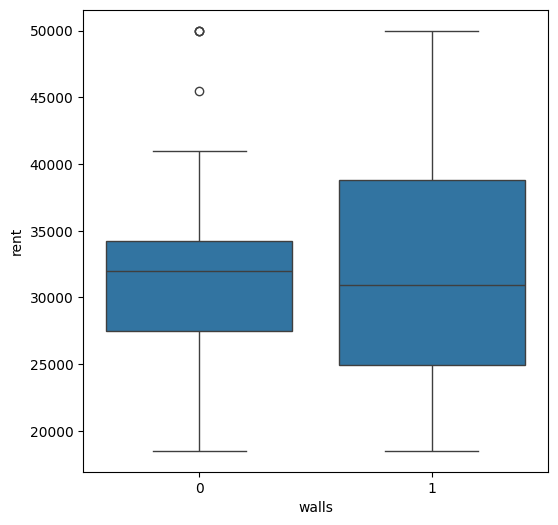

In [38]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='walls', y='rent', data=df)

In [39]:
df_w0 = df[df['walls']==0]
df_w1 = df[df['walls']==1]
print(stats.shapiro(df_w0['rent']))
print(stats.shapiro(df_w1['rent']))

ShapiroResult(statistic=np.float64(0.933226739005949), pvalue=np.float64(0.007335253057037639))
ShapiroResult(statistic=np.float64(0.9402617266306064), pvalue=np.float64(0.000994610464608976))


In [40]:
df.groupby('furniture')[['rent']].mean()

,rent
furniture,
0,23819.047619
1,33382.568807


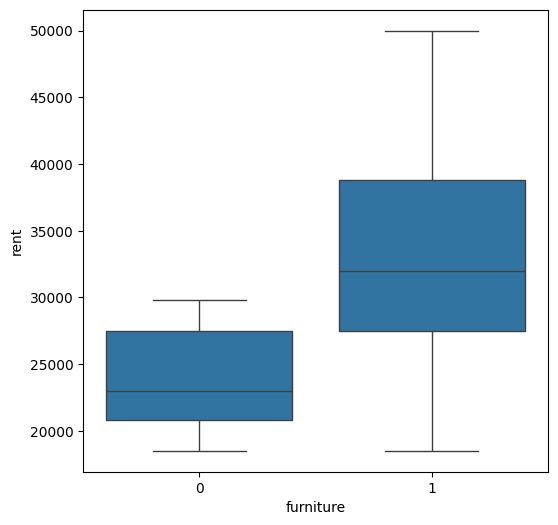

In [41]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='furniture', y='rent', data=df)

In [42]:
df_f0 = df[df['furniture']==0]
df_f1 = df[df['furniture']==1]
print(stats.shapiro(df_f0['rent']))
print(stats.shapiro(df_f1['rent']))

ShapiroResult(statistic=np.float64(0.8863639194506785), pvalue=np.float64(0.019205780415329037))
ShapiroResult(statistic=np.float64(0.956772358164383), pvalue=np.float64(0.0013654028689653987))


In [43]:
df.groupby('district')[['rent']].mean()

,rent
district,
1,34844.736842
2,28065.909091
3,32914.583333


In [44]:
df.groupby('district')[['rent']].count()

,rent
district,
1,38
2,44
3,48


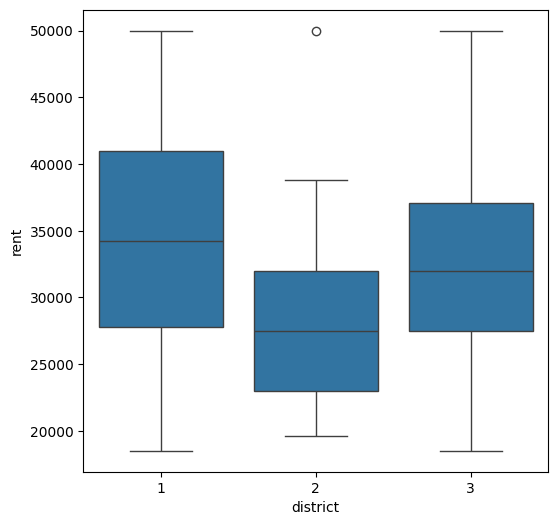

In [45]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='district', y='rent', data=df)

In [46]:
df.loc[(df['rent'] == 50000) & (df['district'] == 2)]

,rent,s,floor,rooms,district,walls,furniture
37,50000,64.0,3,3,2,0,1


In [47]:
df=df.drop(df.index[[37]])

In [ ]:
for district in df['district'].value_counts().keys():
    df_district = df[df['district'] == district]
    print(stats.shapiro(df_district['s']))

ShapiroResult(statistic=np.float64(0.9602146656388362), pvalue=np.float64(0.10299727630172179))
ShapiroResult(statistic=np.float64(0.9183207262584758), pvalue=np.float64(0.0047244966659218774))
ShapiroResult(statistic=np.float64(0.9786481036567604), pvalue=np.float64(0.6694695732931177))


## Связь количественного показателя s (площадь) и категориальных факторов

In [49]:
df.groupby('walls')[['s']].mean()

,s
walls,
0,39.042857
1,34.500000


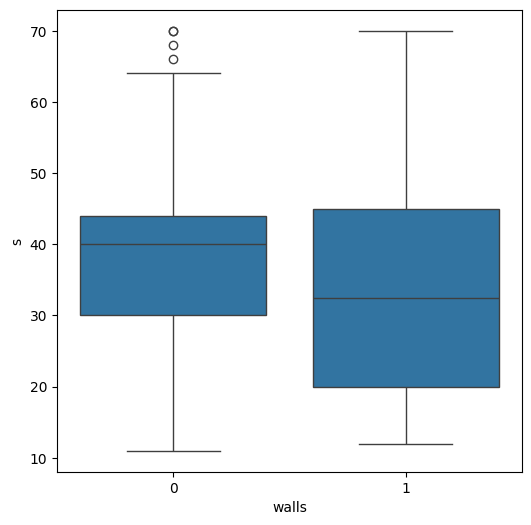

In [50]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='walls', y='s', data=df)

In [51]:
print(stats.shapiro(df_w0['s']))
print(stats.shapiro(df_w1['s']))

ShapiroResult(statistic=np.float64(0.9625370666498104), pvalue=np.float64(0.1135511974608085))
ShapiroResult(statistic=np.float64(0.9499645396232249), pvalue=np.float64(0.003430828008902997))


In [52]:
df.groupby('furniture')[['s']].mean()

,s
furniture,
0,21.904762
1,39.010185


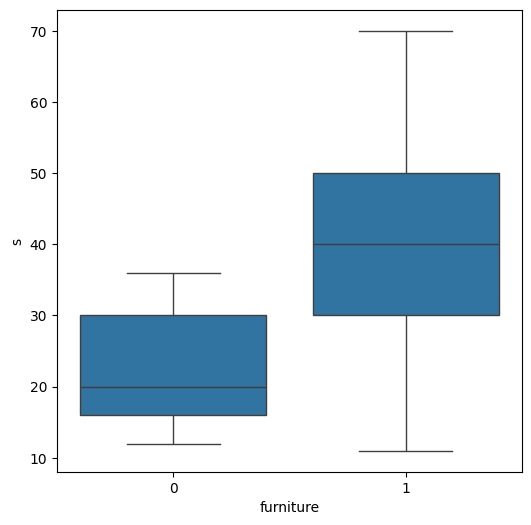

In [53]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='furniture', y='s', data=df)

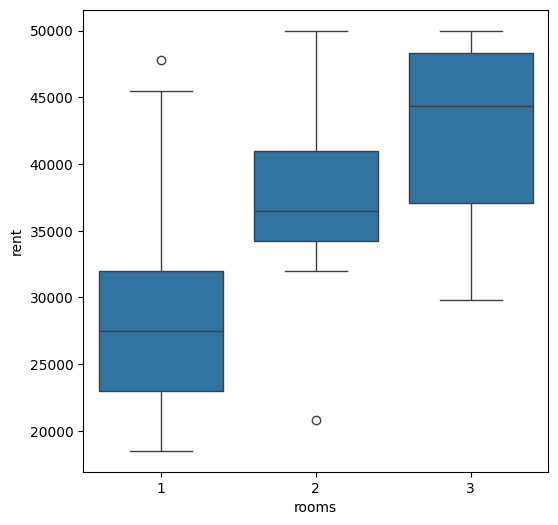

In [54]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='rooms', y='rent', data=df)

## Связь категориальных признаков друг с другом

In [55]:
WF=pd.crosstab(df['walls'],df['furniture']); WF

furniture,0,1
walls,,
0,7,42
1,14,66


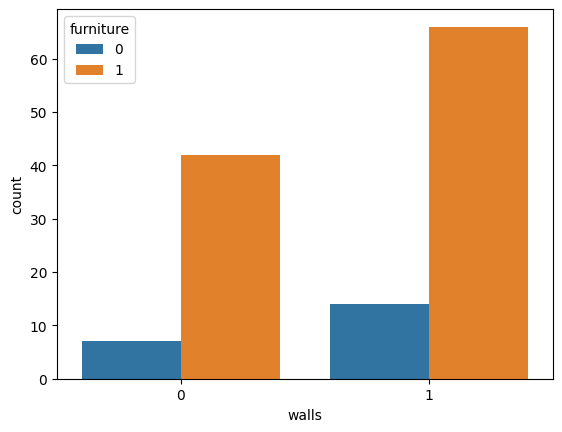

In [56]:
sns.countplot(x=df['walls'], hue=df['furniture']);

In [57]:
WD=pd.crosstab(df['walls'],df['district']); WD

district,1,2,3
walls,,,
0,9,23,17
1,29,20,31


<Axes: xlabel='district', ylabel='count'>

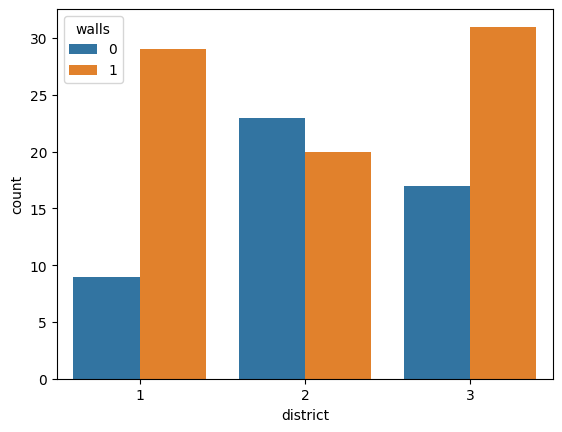

In [58]:
sns.countplot(x=df['district'], hue=df['walls'])

## Связь целевого показателя rent с количественным показателем площади

<Axes: xlabel='s', ylabel='rent'>

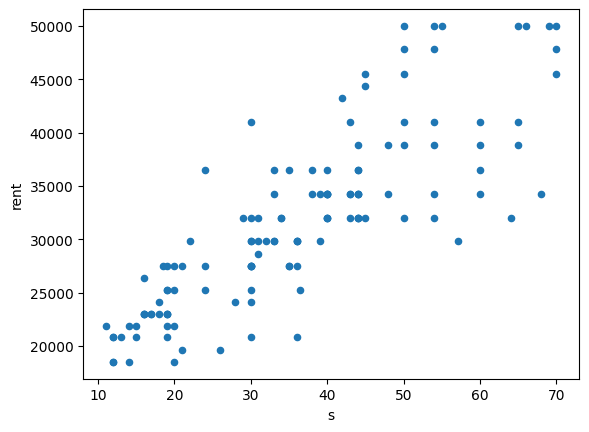

In [59]:
df.plot('s','rent',kind="scatter")

### Проверка нормальности 

In [65]:
import math

n=100 # объем выборки
a=5; s=2 # параметры распределения

X=np.random.normal(a,s,n) # генерация выборки из заданного закона распределения

#### Критерий Шапиро-Уилка

In [ ]:
stats.shapiro(X)

# pvalue - вероятность что нулевая гипотеза истинна

ShapiroResult(statistic=np.float64(0.991057068532827), pvalue=np.float64(0.7494853442608884))

#### Критерий Андерсона-Дарлинга

In [70]:
from scipy.stats import anderson
anderson(X)

AndersonResult(statistic=np.float64(0.20817051659592778), critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(5.070033065952746), scale=np.float64(2.010178425018334))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

#### Критерий Колмогорова-Смирнова

In [ ]:
from scipy.stats import kstest
kstest(X, 'norm')
# неверный вывод, нужен стандартная нормальная случ величина 

KstestResult(statistic=np.float64(0.9282184484749076), pvalue=np.float64(7.989382582777184e-115), statistic_location=np.float64(1.7303760889951803), statistic_sign=np.int8(-1))

In [ ]:
from scipy.stats import kstest
# нормируем и центрируем 
kstest((X-a)/s, 'norm')

# pvalue - вероятность что нулевая гипотеза истинна

KstestResult(statistic=np.float64(0.043099751777580075), pvalue=np.float64(0.9885575449101232), statistic_location=np.float64(1.243182753750359), statistic_sign=np.int8(-1))

In [ ]:
from scipy.stats import kstest

# если не знаем истинные значения, используем их оценки 

mx=np.mean(X)
vx=np.var(X)
sdx=math.sqrt(vx)

kstest((X-mx)/sdx, 'norm')

KstestResult(statistic=np.float64(0.054808458097178825), pvalue=np.float64(0.9084790592120296), statistic_location=np.float64(-0.3713416447192471), statistic_sign=np.int8(1))

#### Критерий Жарка-Бера

In [ ]:
from scipy.stats import jarque_bera
jarque_bera (X)

# pvalue - вероятность что нулевая гипотеза истинна
# если больше 0,05, то нулевая гипотеза принимается и можно работать с выборкой как с нормальной

SignificanceResult(statistic=np.float64(1.6629347736619888), pvalue=np.float64(0.4354099025675011))